### Alternative Fuel Locations

* This project will focus on the density and distribution of alternative fuel locations in the extended Chicago Area.
** The data set used was obtained from the City of Chicago website, and can be accessed following the link: https://data.cityofchicago.org/Environment-Sustainable-Development/Alternative-Fuel-Locations/f7f2-ggz5/data

In [64]:
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import numpy as np

In [65]:
# Reading csv file and creating Data Frame
csv_file = "Alternative_Fuel_Locations.csv"
alternative_fuel_df = pd.read_csv(csv_file)

In [66]:
# Column names for cleaning out some 
alternative_fuel_df.columns

Index(['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Location'],
      dtype='object')

In [67]:
# Searching for empty columns
alternative_fuel_df['Federal Agency ID'].isnull().sum()

1524

In [68]:
# Accessing columns of interest
cleandf = alternative_fuel_df[['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
                               'City', 'State', 'Status Code', 'Expected Date', 
                               'Groups With Access Code', 'Access Days Time', 'EV Other Info', 'EV Network',
                               'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
                               'Date Last Confirmed', 'Owner Type Code',
                               'Federal Agency ID', 'Federal Agency Name', 'Open Date']]

cleandf.head()


,ID,Fuel Type Code,Station Name,Street Address,City,State,Status Code,Expected Date,Groups With Access Code,Access Days Time,...,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date
0,73389,ELEC,ComEd,2 Lincoln Center,Oakbrook Terrace,IL,E,NaN,Private,NaN,...,Non-Networked,NaN,200-9,41.845827,-87.985467,03/07/2022,T,NaN,NaN,11/12/2013
1,152341,ELEC,University of Illinois - 915 S Paulina St,915 S Paulina St,Chicago,IL,E,NaN,Public,NaN,...,Blink Network,http://www.blinkcharging.com/,GPS,41.864575,-87.645374,04/12/2023,NaN,NaN,NaN,01/10/2020
2,193397,ELEC,OIC PARKING OIC STATION 1,10255 W Higgins Rd,Rosemont,IL,E,NaN,Public,24 hours daily,...,ChargePoint Network,http://www.chargepoint.com/,GPS,41.995438,-87.882454,04/12/2023,NaN,NaN,NaN,07/31/2021
3,200330,E85,Casey's General Store,311 S Kinzie Ave,Bradley,IL,E,NaN,Public,24 hours daily,...,NaN,NaN,200-9,41.140532,-87.851305,04/06/2022,P,NaN,NaN,11/01/2021
4,212968,ELEC,MOTORWERKS1475 EV2 MERCEDES,1475 S Barrington Rd,Barrington,IL,E,NaN,Public,24 hours daily,...,ChargePoint Network,http://www.chargepoint.com/,GPS,42.129171,-88.134755,04/12/2023,NaN,NaN,NaN,03/27/2022


In [69]:
# Explore what cities offer the most alternative fuel options
# Obtaining the number of fuel stations by state
bystate_counts = cleandf.groupby(["State"]).count()["ID"]
bystate_counts

State
GA       1
IL    1371
IN     106
WI      67
Name: ID, dtype: int64

* The state with more alternative fuel stations in this dataset is Illinois. Since this list is probably not exhaustive for Indiana, Wisconsin or Georgia, we will analyze tendencies only in Illinois

In [70]:
# Getting a Data Frame with only Illinois State information
bystatedf = cleandf.groupby("State")
illinois_df = bystatedf.get_group("IL")


In [76]:
# Counts of fuel location by City
bycity_counts = illinois_df.groupby(["City"]).count()["ID"]
bycity_counts.sort_values()

# Use bins to group cities by numbers of fuel stations
size_bins = [0, 10, 100, 400]
labels = ["Less than 10", "Between 10-100", "Between 100-400"]
bycity_counts_bins = pd.cut(bycity_counts, size_bins, labels = labels, include_lowest = True)
numbers_bycity = bycity_counts_bins.value_counts()
numbers_bycity

Less than 10       187
Between 10-100      24
Between 100-400      1
Name: ID, dtype: int64

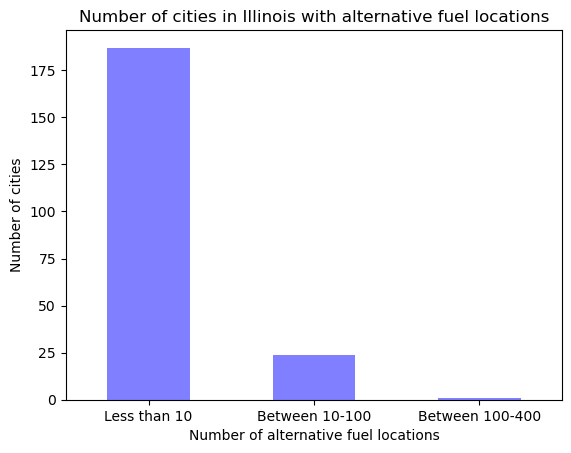

In [77]:
# Bar plots
numbers_bycity.plot.bar(color="b", alpha=0.5, align="center")
plt.title("Number of cities in Illinois with alternative fuel locations")
plt.xlabel("Number of alternative fuel locations")
plt.ylabel("Number of cities")
x_axis = np.arange(len(numbers_bycity))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="horizontal");